## Verify

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, json
import numpy as np
import tensorflow as tf
if ".." not in sys.path:
    sys.path.append("..")
import chomp_rules
import model
import engine

In [2]:
game = json.loads(open("../run1/games/games-001.json").readline())

In [3]:
config = chomp_rules.ChompGameConfig(16, 16)
to_board = lambda b: chomp_rules.ChompState(config=config, limits=b[:], to_move=1)

In [4]:
new_board = to_board(game["boards"][0])
for board_desc, move in zip(game["boards"], game["moves"]):
    move = map(int, move.split(","))
    assert new_board.limits == board_desc
    new_board = to_board(board_desc)
    new_board.apply_move(move)

In [5]:
net = model.Network("net/")
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
model.load_model(sess, "../run1/models/model-001/")

INFO:tensorflow:Restoring parameters from ../run1/models/model-001/model.ckpt


In [7]:
board = to_board(game["boards"][0])
print board

. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .


In [8]:
features = engine.board_to_features(board)
p, v = sess.run(
    [net.policy_output, net.value_output],
    feed_dict={
        net.input_ph: [features],
        net.is_training_ph: False,
    },
)

In [12]:
features[:,:,1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)

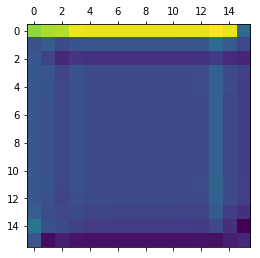

In [18]:
plt.matshow(p[0])